# Loan Approval System using Self Organizing Map

### Importing the libraries


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [17]:
dataset = pd.read_csv('Loan_Approval_Dataset.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [19]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


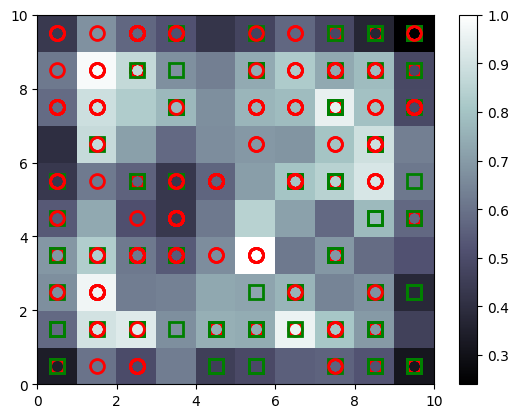

In [20]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the Approved Candidates


In [21]:
mappings = som.win_map(X)

# Convert lists to numpy arrays
app_1 = np.array(mappings.get((1, 1), []))  # use .get() to handle missing keys
app_2 = np.array(mappings.get((4, 1), []))

# Only concatenate if both arrays are non-empty
app_arrays = []

if app_1.size > 0:  # Check if fraud_1 is not empty
    if app_1.ndim == 1:
        app_1 = app_1.reshape(-1, app_1.shape[0])  # reshape to 2D
    app_arrays.append(app_1)

if app_2.size > 0:  # Check if fraud_2 is not empty
    if app_2.ndim == 1:
        app_2 = app_2.reshape(-1, app_2.shape[0])  # reshape to 2D
    app_arrays.append(app_2)

# Only concatenate if we have non-empty arrays
if app_arrays:
    approved = np.concatenate(app_arrays, axis=0)
    # Inverse transform the concatenated fraud data
    approved = sc.inverse_transform(approved)
else:
    print("No fraud data available for the specified mappings.")


## Printing the Approved Clients

In [22]:
print('Approved Customer IDs')
for i in approved[:, 0]:
  print(int(i))

Approved Customer IDs
15608595
15761158
15666166
15605872
15665087
15644446
15585892
15609356
15588123
15672432
15583680
15572390
15575243
15566495
15663194
15568878
15631693
15671534
15613699
15667460
15569394
15594651
